# Superposition and Entanglement in Qiskit
This notebook demonstrates:
1. **Superposition** using a single qubit.
2. **Entanglement** using two qubits.
We will use Qiskit to create circuits, visualize the states, and measure outcomes.

In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.2 MB/s eta 0:00:00


In [2]:
# ===========================
# Import Libraries
# ===========================
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

## 1. Superposition Example

In [3]:
# ===========================
# Superposition Example
# ===========================
# Create 1-qubit circuit
qc_super = QuantumCircuit(1)

# Apply Hadamard gate to create superposition
qc_super.h(0)

# Draw the circuit
qc_super.draw('text')

# Get statevector
state_super = Statevector.from_instruction(qc_super)
plot_bloch_multivector(state_super)
plt.show()

# Measure and simulate
qc_super.measure_all()
simulator = AerSimulator()
job_super = simulator.run(qc_super, shots=1024)
result_super = job_super.result()
counts_super = result_super.get_counts()
print("Superposition Measurement Counts:", counts_super)
plot_histogram(counts_super)
plt.show()

Superposition Measurement Counts: {'1': 498, '0': 526}


## 2. Entanglement Example

In [4]:
# ===========================
# Entanglement Example
# ===========================
# Create 2-qubit circuit
qc_ent = QuantumCircuit(2)

# Apply Hadamard on qubit 0
qc_ent.h(0)

# Apply CNOT to entangle qubit 0 and 1
qc_ent.cx(0, 1)

# Draw the circuit
qc_ent.draw('text')

# Get statevector
state_ent = Statevector.from_instruction(qc_ent)
print("Entangled Statevector:", state_ent)
plot_bloch_multivector(state_ent)
plt.show()

# Measure and simulate
qc_ent.measure_all()
job_ent = simulator.run(qc_ent, shots=1024)
result_ent = job_ent.result()
counts_ent = result_ent.get_counts()
print("Entanglement Measurement Counts:", counts_ent)
plot_histogram(counts_ent)
plt.show()

Entangled Statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
Entanglement Measurement Counts: {'11': 508, '00': 516}


Task 1: Superposition — Demonstrating a Single Qubit in Superposition
----------------------------------------------------------------------

Quantum Circuit:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

Bloch Sphere Visualization:


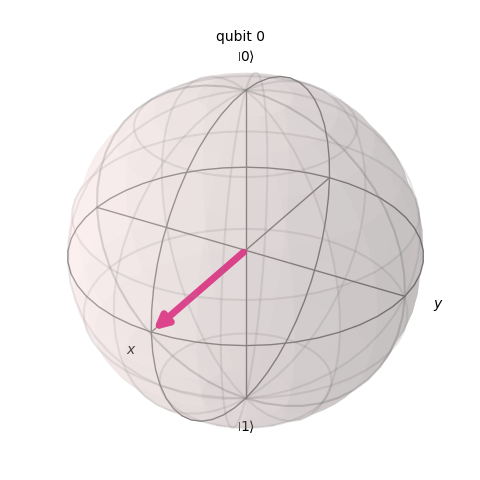


Measurement Results (Superposition):
{'1': 531, '0': 493}

Histogram of Measurement Results:


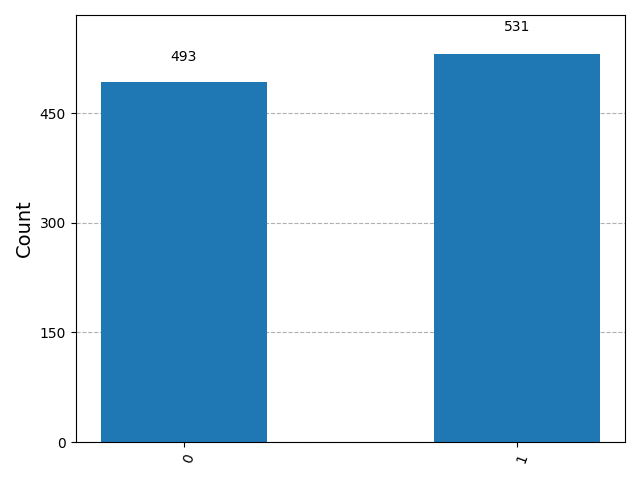

In [5]:
print("Task 1: Superposition — Demonstrating a Single Qubit in Superposition")
print("-" * 70)

# Step 1: Create simulator
simulator = AerSimulator()

# Step 2: Create 1-qubit circuit with measurement
qc = QuantumCircuit(1, 1)
qc.h(0)          # Apply Hadamard gate to create superposition
qc.measure(0, 0) # Measure qubit into classical bit

# Step 3: Display circuit diagram (text mode)
print("\nQuantum Circuit:")
print(qc.draw(output='text'))

# Step 4: Bloch sphere visualization (before measurement)
qc_state = QuantumCircuit(1)
qc_state.h(0)  # Apply Hadamard only, no measurement
state = Statevector.from_instruction(qc_state)

# Render Bloch sphere as image for Colab
fig_bloch = plot_bloch_multivector(state)
fig_bloch.savefig("bloch.png")
print("\nBloch Sphere Visualization:")
display(Image("bloch.png"))

# Step 5: Transpile and run simulation
tqc = transpile(qc, simulator)
job = simulator.run(tqc, shots=1024)
result = job.result()
counts = result.get_counts()

# Step 6: Print measurement results
print("\nMeasurement Results (Superposition):")
print(counts)

# Step 7: Histogram visualization
fig_hist = plot_histogram(counts)
fig_hist.savefig("histogram.png")
print("\nHistogram of Measurement Results:")
display(Image("histogram.png"))

Task 2: Entanglement — Demonstrating a 2-Qubit Bell State
----------------------------------------------------------------------

Quantum Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Bloch Sphere Visualization:


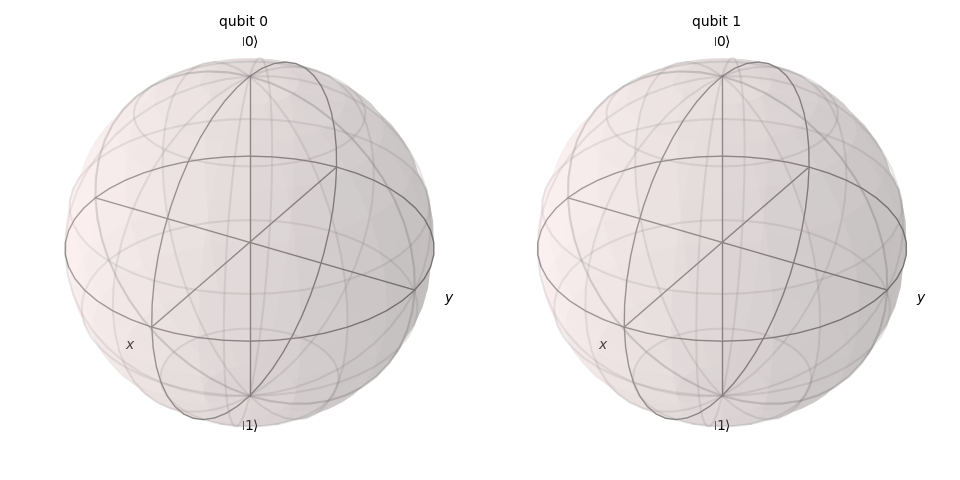


Measurement Results (Entanglement):
{'11': 521, '00': 503}

Histogram of Measurement Results:


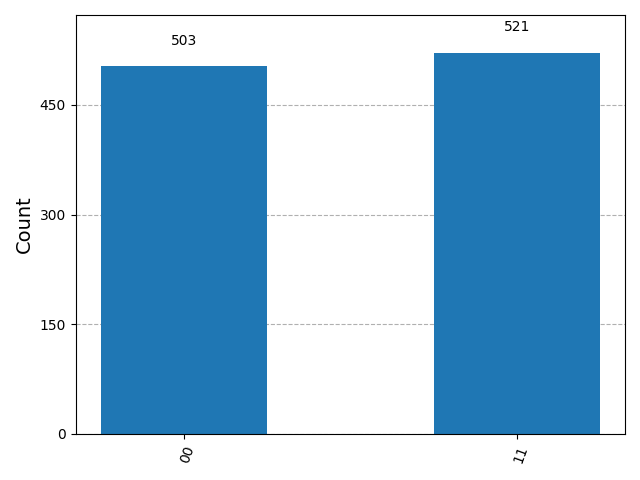

In [6]:
print("Task 2: Entanglement — Demonstrating a 2-Qubit Bell State")
print("-" * 70)

# Step 1: Create simulator
simulator = AerSimulator()

# Step 2: Create 2-qubit circuit
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)      # Apply Hadamard to qubit 0
qc_ent.cx(0, 1)  # Apply CNOT to entangle qubit 0 and 1
qc_ent.measure([0,1], [0,1])  # Measure both qubits

# Step 3: Display circuit diagram (text mode)
print("\nQuantum Circuit:")
print(qc_ent.draw(output='text'))

# Step 4: Bloch sphere visualization (before measurement)
# Note: For 2 qubits, Bloch multivector shows individual qubit states
state_ent = Statevector.from_instruction(qc_ent.remove_final_measurements(inplace=False))
fig_bloch = plot_bloch_multivector(state_ent)
fig_bloch.savefig("bloch_ent.png")
print("\nBloch Sphere Visualization:")
display(Image("bloch_ent.png"))

# Step 5: Transpile and run simulation
tqc_ent = transpile(qc_ent, simulator)
job_ent = simulator.run(tqc_ent, shots=1024)
result_ent = job_ent.result()
counts_ent = result_ent.get_counts()

# Step 6: Print measurement results
print("\nMeasurement Results (Entanglement):")
print(counts_ent)

# Step 7: Histogram visualization
fig_hist_ent = plot_histogram(counts_ent)
fig_hist_ent.savefig("histogram_ent.png")
print("\nHistogram of Measurement Results:")
display(Image("histogram_ent.png"))